<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Data%20Analysis%20%5BTabular%5D%3A%20TMDB-Movie%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TMDB-Movie Data Analysis

by Muhammad Efan Abdulfattah

the dataset is from kaggle and the dataset contains information about 10,000 movies collected from The Movie Database (TMDb)

In [1]:
# connect to GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Data Understanding

In [2]:
# initiate path to get data from GoogleDrive
path = '/content/drive/MyDrive/learningPy/dataset/' # adjust it with yours

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline

##### **data loading**

In [4]:
# load and inspect the first five rows
df = pd.read_csv(path+"tmdb-movies.csv")
df.head(3)

# df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


##### **variables**

```
id >> data id
imdb_id >> data id by imdb
popularity
budget >> in USD
revenue  >> in USD
original_title
cast
homepage >> movie website
director
tagline
keywords
overview
runtime >> in minutes
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj >> adjusted budget (in USD)
revenue_adj >> adjusted revenue (in USD)
```

#####**show statistical description**

In [5]:
# show statistical description
df.describe()

# to show the whole data (including string datatype) you can use it: df.describe(include='all')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### **question asking**

```
1. Number of Released Movie by Year?
2. Popularity based on Top-5 Genre?
3. Top-10 Profitable Movie?
4. Profit vs. Popularity?
5. Runtime vs. Profit?
6. Popular Keyword on One Decade (2006-2015)?
```

#### 2. Data Preprocessing

##### **duplicated data checking**

In [6]:
# check for the duplicates in the dataset
df.duplicated().sum()

1

In [7]:
# deep dive into the duplicate data
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# drop one of the duplicate data
df.drop(2089, axis=0, inplace=True)

#df.drop('id', axis=1, inplace=True)
# 2089 is the index number of duplicate data
# axis=0 means row- if axis=1 means column

# you either can use it to drop duplicate data
#df.drop_duplicates(inplace=True)

In [9]:
# then, re-check the dataset
df.duplicated().sum()

0

##### **missing value handling**

*Some ways to handle missing value (na/null):*
```
1. Fill missing value data with particular value (based on correlation with the other features)
2. Fill missing value data with statistical-based method, ex.: Mean, Median, Modus
3. Drop data
```

In [10]:
# Check the shape / dimension of the dataset (row, column)
df.shape

(10865, 21)

In [11]:
# detailed checking on missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

as you can see here, on the header it states that there are 10865 entries/data, but, in some features/variables there are different value (in Count). Thus, it is detected as Missing Value.

Let's check this out in a more detailed way, below.

In [12]:
# more detailed checking on missing values
df.isna().sum()

# isna() = check is there any na/null value
# sum()  = summing all missing value from every variable

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
df.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4123,30072,tt0256276,0.214587,25000000,10113733,Possession,Gwyneth Paltrow|Aaron Eckhart|Jeremy Northam|J...,NaN,Neil LaBute,The past will connect them. The passion will p...,NaN,"Maud Bailey, a brilliant English academic, is ...",102,Drama|Mystery,Warner Bros. Pictures|Focus Features|Baltimore...,10/2/02,23,6.6,2002,3.030653e+07,1.226049e+07


In [14]:
for var in df.columns:
  if df[var].isna().sum() > 0:
    mv = df[var].isna().sum() / df.shape[0]
    print(f'missing value on {var}: {mv*100:.2f}%')

missing value on imdb_id: 0.09%
missing value on cast: 0.70%
missing value on homepage: 72.98%
missing value on director: 0.40%
missing value on tagline: 25.99%
missing value on keywords: 13.74%
missing value on overview: 0.04%
missing value on genres: 0.21%
missing value on production_companies: 9.48%


those percentage are missing values, let's handle it.

In [15]:
# check for unique values in the dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

###### feature: imdb_id, homepage, tagline

In [16]:
# we have known that there more than a quarter missing value on these features, 
# and considering these features are unique and not really necessary to our analysis
# so, we can drop them
df.drop(['imdb_id','homepage','tagline'], axis=1, inplace=True) # axis = 1 (column) | axis = 0 (row)

# data preview
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


###### feature: keywords

In [17]:
# this feature is important, but, there are many missing values
# if we change the missing values to 0 or another value, it will bring up another problem
# because it's little bit unique, and if we set to particular value the mode (modus) will change to that value
# so, let's drop only the row with missing value
df.dropna(subset=['keywords'],axis=0,inplace=True)

# missing value preview
df.isna().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                     45
director                 16
keywords                  0
overview                  2
runtime                   0
genres                    5
production_companies    667
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

######feature: production_companies

In [18]:
# unique value checking
df.production_companies.value_counts()

Paramount Pictures                                                                             151
Universal Pictures                                                                             120
Warner Bros.                                                                                    79
Columbia Pictures                                                                               71
Metro-Goldwyn-Mayer (MGM)                                                                       68
                                                                                              ... 
Duplass Brothers Productions|Venture Forth                                                       1
Columbia Pictures Corporation|Morningside Productions                                            1
Alejandro MartÃ­nez                                                                              1
Universal Pictures|Dentsu|Relativity Media|Apatow Productions|Stoller Global Solutions           1
Wild Bunch

In [19]:
# based on data above, company whose the most film only having 151 films
# beside that, we have 600++ missing values, if we change it to particular value
# will lead to bias problem, so we can drop the row with missing value
df.dropna(subset=['production_companies'],axis=0,inplace=True)

# missing value preview
df.isna().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                    25
director                10
keywords                 0
overview                 1
runtime                  0
genres                   4
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

######feature: cast, director, overview, genres

In [20]:
# data is important, since there only little bit missing value (< 1%)
# we can fill the missing value with: 0
df.fillna(0, inplace=True)

# re-check missing value data
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

##### **feature selection (eliminate unnecessary features)**

In [21]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [22]:
# eliminate unused columns
df.drop(['overview','budget','revenue'], axis=1, inplace=True)

# data preview
df.sample()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7991,850,1.494805,A Christmas Story,Melinda Dillon|Darren McGavin|Peter Billingsle...,Bob Clark,holiday|nostalgia|young boy|bb gun|essay,94,Comedy|Family,Metro-Goldwyn-Mayer (MGM)|Christmas Tree Films,11/18/83,186,7.1,1983,0.0,4.224090e+07


elimination reason:

- overview: we don't really need it since we have **keywords**
- budget & revenue: we got **budget_adj** & **revenue_adj**, so the exchange rate are level from each films considering the released year is started from 1966 to 2015, in a nutshell: inflation

##### **transforming 'release_date' variable into date-time format**

In [23]:
# check data in 'release_date'
df['release_date'].head(1)

0    6/9/15
Name: release_date, dtype: object

In [24]:
# transform it into date-time format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(1)

# YEAR-MONTH-DATE

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

##### **simple EDA**

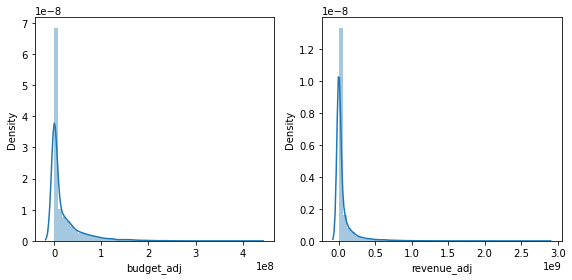

In [25]:
# checking 0 value in 'budget_adj' & 'revenue_adj'
fig,axes = plt.subplots(figsize=(8,4), nrows=1, ncols=2)

sns.distplot(df['budget_adj'], ax=axes[0])
sns.distplot(df['revenue_adj'], ax=axes[1])

plt.tight_layout()
plt.show()

because we are not going to do machine learning here (prediction/clustering), so we can let as it is

*note: the 0 value widely known as outlier & the distribution of data is right-skewed

#### 3. EDA (Exploratory Data Analysis)

##### **Number of Released Movie by Year**

In [63]:
df['release_year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 8705, dtype: int64

In [64]:
# group for each year and count the number of movies on each year 
movie_per_year = df.groupby('release_year').count()
movie_per_year['id']

release_year
1960     30
1961     28
1962     30
1963     33
1964     41
1965     33
1966     44
1967     36
1968     36
1969     25
1970     39
1971     54
1972     36
1973     55
1974     43
1975     40
1976     44
1977     54
1978     59
1979     54
1980     72
1981     74
1982     78
1983     74
1984     97
1985     96
1986    104
1987    104
1988    120
1989    120
1990    123
1991    111
1992    121
1993    166
1994    164
1995    159
1996    182
1997    174
1998    181
1999    198
2000    185
2001    196
2002    221
2003    214
2004    237
2005    300
2006    327
2007    351
2008    382
2009    414
2010    343
2011    386
2012    390
2013    458
2014    525
2015    444
Name: id, dtype: int64

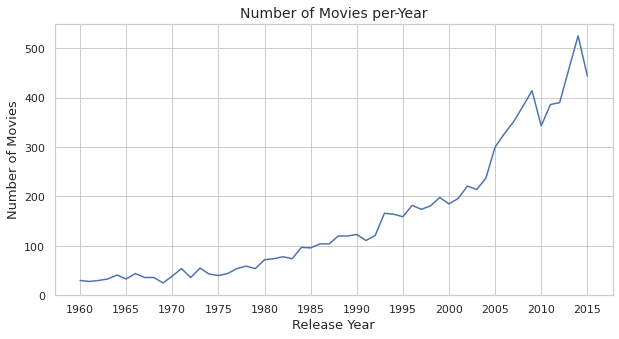

In [69]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)}) # rc=rectangular
plt.title("Number of Movies per-Year",fontsize = 14)

plt.xlabel('Release Year',fontsize = 13)
plt.ylabel('Number of Movies',fontsize = 13)

# set the style sheet
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

##### **Popularity based on Top-5 Genre**

In [71]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 8705, dtype: object

In [72]:
df['genres'].value_counts()

Drama                                                  567
Comedy                                                 526
Drama|Romance                                          248
Comedy|Drama                                           233
Comedy|Romance                                         224
                                                      ... 
Action|Adventure|Romance|Thriller                        1
Romance|Comedy|Horror                                    1
Action|Adventure|Animation|Science Fiction|Thriller      1
Western|History|War                                      1
Crime|History                                            1
Name: genres, Length: 1793, dtype: int64

In [73]:
genre = df['genres'].value_counts()
genre = list(genre[:5].index)
genre

['Drama', 'Comedy', 'Drama|Romance', 'Comedy|Drama', 'Comedy|Romance']

In [74]:
df_genre = df.query(f'genres == {genre}')
df_genre['genres'].value_counts()

Drama             567
Comedy            526
Drama|Romance     248
Comedy|Drama      233
Comedy|Romance    224
Name: genres, dtype: int64

**level of popularity by genre**

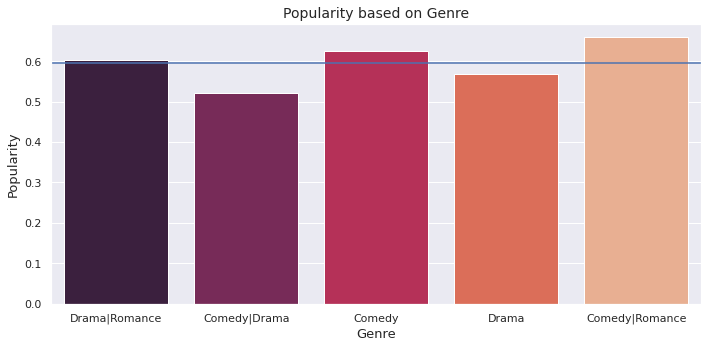

In [89]:
# set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)}) 

# initiate barplot
graph = sns.barplot(x=df_genre['genres'], y=df_genre['popularity'], palette='rocket', ci=None) # ci = confidence interval, to draw estimated error bar

graph.axhline(df_genre['popularity'].mean()) # blue line

plt.title('Popularity based on Genre',fontsize = 14)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Popularity',fontsize = 13)

# set the style sheet
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

**level of popularity by genre per-year**

<Figure size 1080x504 with 0 Axes>

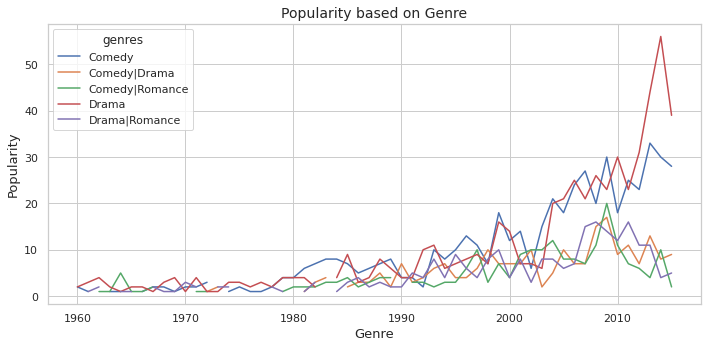

In [90]:
# set the figure size and labels
plt.figure(figsize=(15,7))

# initiate barplot
graph = df_genre.groupby(['release_year','genres']).count()['popularity'].unstack().plot()

plt.title('Popularity based on Genre',fontsize = 14)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Popularity',fontsize = 13)

# set the style sheet
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

#####**Top-10 Most Profitable Movies**

In [28]:
df['profit'] = df['revenue_adj'] - df['budget_adj'] # add new feature (usually called as feature engineering)

In [61]:
df.sample()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2479,11355,0.614007,Never Been Kissed,Drew Barrymore|David Arquette|Michael Vartan|M...,Raja Gosnell,chicago|journalist|newspaper|undercover|entrap...,107,Romance|Comedy|Drama,Fox 2000 Pictures|Flower Films (II)|Bushwood P...,1999-04-09,196,5.7,1999,3.272632e+07,1.107004e+08,7.797403e+07


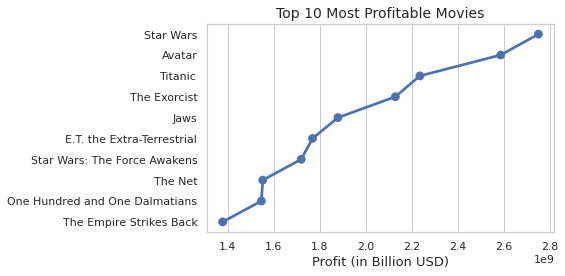

In [52]:
# make a plot which contain top 10 movies which earn highest profit.
# sort the 'Profit' column in decending order and store it in a new dataframe,
df_profit = pd.DataFrame(df['profit'].sort_values(ascending = False))
df_profit['original_title'] = df['original_title']

# data to be retrieved (top 10 most profitable movies)
x = list(df_profit['original_title'][:10]) # movie title
y = list(df_profit['profit'][:10]) # profit

# make a plot using pointplot for top 10 most profitable movies.
ax = sns.pointplot(x=y,y=x)

# set up the figure size
sns.set(rc={'figure.figsize':(8,6)})
# set up the title and labels of the plot.
ax.set_title("Top 10 Most Profitable Movies",fontsize = 14)
ax.set_xlabel("Profit (in Billion USD)",fontsize = 13)

# set the style sheet
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

##### **Profit vs. Popularity**

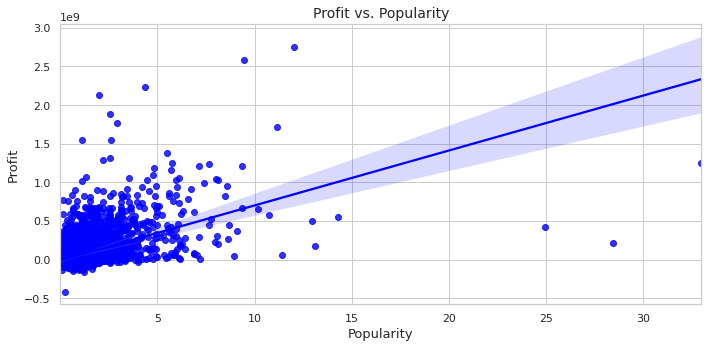

Correlation Between Profit And Popularity :  0.5580417831832766


In [64]:
ax = sns.regplot(x=df['popularity'],y=df['profit'],color='blue')

# setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

# setup the title and the labels of the scatter plot.
ax.set_title("Profit vs. Popularity",fontsize=14)
ax.set_xlabel("Popularity",fontsize=13)
ax.set_ylabel("Profit",fontsize=13)

# set the style sheet
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

# find the correlation between two variables
data_corr = df.corr()
print("Correlation Between Profit And Popularity : ",data_corr.loc['popularity','profit'])

##### **Runtime (duration) vs. Profit**

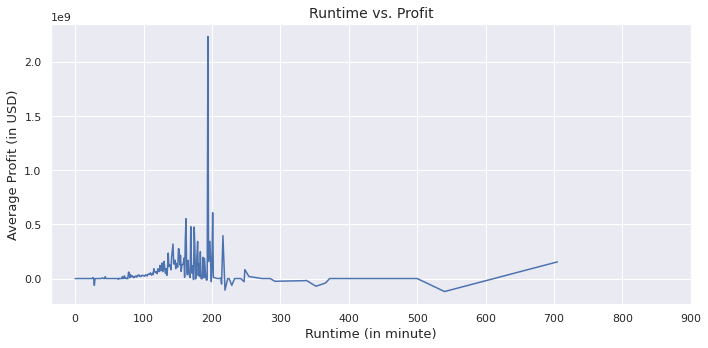

In [69]:
# set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})

# groupby data
df.groupby('runtime')['profit'].mean().plot(xticks=np.arange(0,1000,100))

# set up the title of the figure
plt.title("Runtime vs. Profit",fontsize = 14)

# set up the x-label and y-label of the plot.
plt.xlabel('Runtime (in minute)',fontsize = 13)
plt.ylabel('Average Profit (in USD)',fontsize = 13)

# set the style sheet
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

##### **Most Popular Keyword on One Decade (2006-2015)**

In [70]:
from wordcloud import WordCloud, STOPWORDS 

In [73]:
# select data
df_decade = df.query('release_year >= 2006')

print(f'Release Year:\n{df_decade.release_year.value_counts()}')
print(f'\nNew DataFrame:\n{df_decade}')

Release Year:
2014    525
2013    458
2015    444
2009    414
2012    390
2011    386
2008    382
2007    351
2010    343
2006    327
Name: release_year, dtype: int64

New DataFrame:
          id  popularity  ...   revenue_adj        profit
0     135397   32.985763  ...  1.392446e+09  1.254446e+09
1      76341   28.419936  ...  3.481613e+08  2.101614e+08
2     262500   13.112507  ...  2.716190e+08  1.704191e+08
3     140607   11.173104  ...  1.902723e+09  1.718723e+09
4     168259    9.335014  ...  1.385749e+09  1.210949e+09
...      ...         ...  ...           ...           ...
7816   13068    0.027512  ...  0.000000e+00  0.000000e+00
7817   15261    0.020514  ...  0.000000e+00  0.000000e+00
7818   46169    0.019669  ...  0.000000e+00  0.000000e+00
7820   21623    0.017396  ...  0.000000e+00  0.000000e+00
7821   39561    0.013017  ...  0.000000e+00 -1.156835e+06

[4020 rows x 16 columns]


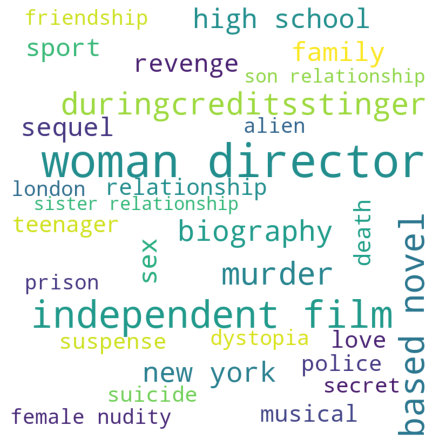

In [82]:
container = '' 
stopwords = set(STOPWORDS) 

# iterate through the data 
for kw in df_decade.keywords: 
	kw = str(kw) # convert to string format
	tokens = kw.split() # split the kw-value 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() # converts each token into lowercase
	
  # store every token into variable: 'container'
	container += ' '.join(tokens)+' '

# wordcloud configuration
wordcloud = WordCloud(max_words=30, width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(container) 

# plot the WordCloud image					 
plt.figure(figsize = (6, 6), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 

plt.tight_layout(pad=0) 
plt.show() 

In [83]:
container

"monster|dna|tyrannosaurus rex|velociraptor|island future|chase|post-apocalyptic|dystopia|australia based on novel|revolution|dystopia|sequel|dystopic future android|spaceship|jedi|space opera|3d car race|speed|revenge|suspense|car father-son relationship|rape|based on novel|mountains|winter saving the world|artificial intelligence|cyborg|killer robot|future based on novel|mars|nasa|isolation|botanist assistant|aftercreditsstinger|duringcreditsstinger|evil mastermind|minions dream|cartoon|imaginary friend|animation|kid spy|based on novel|secret agent|sequel|james bond jupiter|space|woman director|3d|interspecies romance dancing|artificial intelligence|helicopter|distrust|isolation video game|nerd|alien attack|3d|pixels marvel comic|comic|sequel|superhero|vision bounty hunter|wyoming|mountains|hangman|voice over narration revenge|murder|on the run|fugitive|framed marvel comic|superhero|aftercreditsstinger|duringcreditsstinger|marvel cinematic universe cinderella|magic|fairy tale|princes

### 4. Conclusions

```
1. In period of 2010 - 2015 is the highest rate of released film.
2. In overall Comedy|Romance film is most popular genre, but, in the last 10 years most of people love a film with Drama genre.
3. The first edition of Star Wars (1977) is the most profitable film in the span of 1966 - 2015.
4. People not really love a film with extra-long duration, the most ideal time is between 2 - 3 hours. 
```